In [1]:

train_folder = 'D:/ML/lumgs_cancer_classification_ct_scan/Data/train'
test_folder = 'D:/ML/lumgs_cancer_classification_ct_scan/Data/test'
validate_folder = 'D:/ML/lumgs_cancer_classification_ct_scan/Data/valid'

normal_folder = '/normal'
adenocarcinoma_folder = '/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
large_cell_carcinoma_folder = '/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
squamous_cell_carcinoma_folder = '/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout2D, Activation, Lambda, Flatten, LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import utils

print("Libraries Imported")

# Read data from the folders
IMAGE_SIZE = (350, 350)

print("Reading training images from:", train_folder)
print("Reading validation images from:", validate_folder)

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 6

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical'
)


Libraries Imported
Reading training images from: D:/ML/lumgs_cancer_classification_ct_scan/Data/train
Reading validation images from: D:/ML/lumgs_cancer_classification_ct_scan/Data/valid
Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [10]:
OUTPUT_SIZE = 4

pretrained_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
pretrained_model.trainable = False

model = Sequential()
model.add(pretrained_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(OUTPUT_SIZE, activation='softmax'))

print("Pretrained model used:")
# pretrained_model.summary()

print("Final model created:")
# model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Pretrained model used:
Final model created:


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
The image belongs to class: adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib


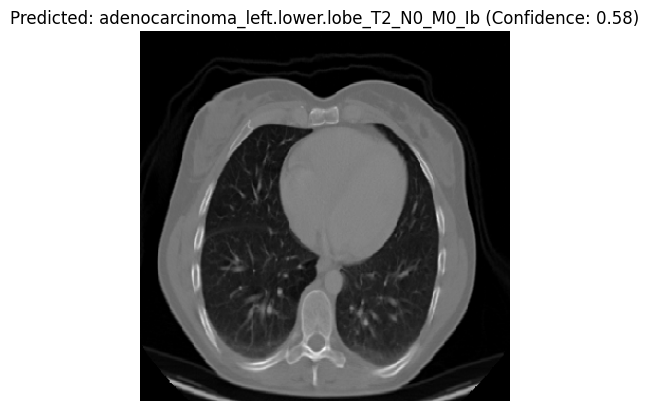

In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Define image size (should match training configuration)
CLASS_LABELS = list(train_generator.class_indices.keys())

# Load the trained model
model_path = 'trained_lung_cancer_model.h5'  # Update with the correct path to your saved model
model = load_model(model_path)

# Preprocessing function
def load_and_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image to [0, 1]
    return img_array

# Path to the test image
img_path = 'D:/ML/lumgs_cancer_classification_ct_scan/Data/test/adenocarcinoma/000108 (3).png'

# Preprocess the image
img = load_and_preprocess_image(img_path, IMAGE_SIZE)

# Make predictions
predictions = model.predict(img)
predicted_class = np.argmax(predictions[0])
confidence_score = predictions[0][predicted_class]  # Confidence of the predicted class

# Map the predicted class to its label
predicted_label = CLASS_LABELS[predicted_class]

# Print the predicted class
print(f"The image belongs to class: {predicted_label}")

# Display the image with the predicted label
plt.imshow(image.load_img(img_path, target_size=IMAGE_SIZE))
plt.title(f"Predicted: {predicted_label}")
plt.title(f"Predicted: {predicted_label} (Confidence: {confidence_score:.2f})")

plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
The image belongs to class: normal
Confidence: 0.58


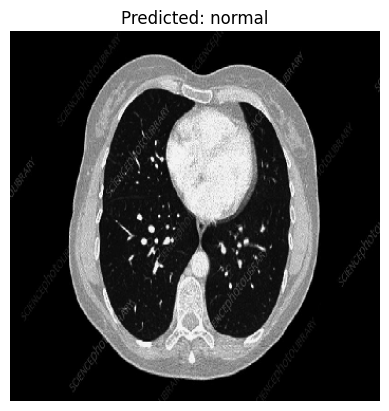

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Define image size (should match training configuration)
CLASS_LABELS = list(train_generator.class_indices.keys())

# Load the trained model
model_path = 'trained_lung_cancer_model.h5'  # Update with the correct path to your saved model
model = load_model(model_path)

# Preprocessing function
def load_and_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image to [0, 1]
    return img_array

# Path to the test image
img_path = 'Data/test/normal/6 - Copy (3).png'

# Preprocess the image
img = load_and_preprocess_image(img_path, IMAGE_SIZE)

# Make predictions
predictions = model.predict(img)
predicted_class = np.argmax(predictions[0])

# Map the predicted class to its label
predicted_label = CLASS_LABELS[predicted_class]

# Print the predicted class
print(f"The image belongs to class: {predicted_label}")

# Display the image with the predicted label
print((f"Confidence: {confidence_score:.2f}"))

plt.imshow(image.load_img(img_path, target_size=IMAGE_SIZE))
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
The image belongs to class: r
Confidence score for the prediction: 0.9755


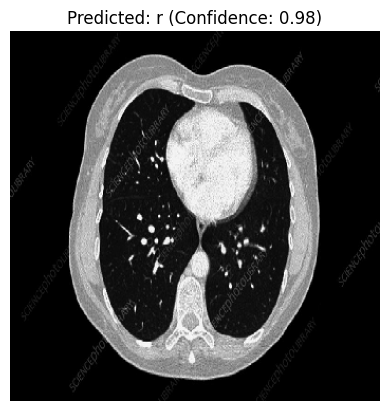

('r', np.float32(0.9755307))

In [12]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
predicted_label = CLASS_LABELS[predicted_class]

def predict_image_class(img_path, model_path,class_labels, image_size=(350, 350)):
    """
    Predict the class of an image using the trained model and display the image with the prediction.
    
    Parameters:
    - img_path (str): The path to the image file.
    - model_path (str): The path to the trained model file.
    - image_size (tuple): The target size to which the image will be resized. Default is (350, 350).
    - class_labels (list): A list of class labels. If None, it will be derived from the model.

    Returns:
    - predicted_label (str): The predicted class label.
    - confidence_score (float): The confidence score for the prediction.
    """
    
    # Load the trained model
    model = load_model(model_path)
    
    # Define image preprocessing function
    def load_and_preprocess_image(img_path, target_size):
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array /= 255.0  # Normalize the image to [0, 1]
        return img_array
    
    # Preprocess the image
    img = load_and_preprocess_image(img_path, image_size)
    
    # Make predictions
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions[0])
    confidence_score = predictions[0][predicted_class]  # Confidence of the predicted class

    # Map the predicted class to its label
    if class_labels is None:
        class_labels = list(model.class_indices.keys())  # Derive class labels from the model if not provided
    
    predicted_label = class_labels[predicted_class]

    # Print the predicted class and confidence score
    print(f"The image belongs to class: {predicted_label}")
    print(f"Confidence score for the prediction: {confidence_score:.4f}")
    
    # Display the image with the predicted label and confidence score
    plt.imshow(image.load_img(img_path, target_size=image_size))
    plt.title(f"Predicted: {predicted_label} (Confidence: {confidence_score:.2f})")
    plt.axis('off')
    plt.show()

    return predicted_label, confidence_score

# Example usage
img_path = 'Data/test/normal/6 - Copy (3).png'
model_path = 'trained_lung_cancer_model.h5'

predict_image_class(img_path, model_path,predicted_label)
